<a href="https://colab.research.google.com/github/DimpleDR/Computational-Data-Science/blob/Projects/M3_SNB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1bSX5aV8jD39Lk8FpcJpCabY5TKgtHb49/view?usp=sharing) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio

### Import Neccesary Packages

In [2]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [3]:
wav_files = glob.glob("Tess/*/*.wav")
len(wav_files)

2679

#### Play the sample audio

In [4]:
ipd.Audio('Tess/YAF_fear/YAF_cool_fear.wav')

### Data Exploration and Visualization (1 points)

#### Visualize the distribution of all the labels

In [5]:
emotions_ = []
for file in wav_files:
    emotions_.append(file.split("_")[-1][:-4])
set(emotions_)

{'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'}

<BarContainer object of 7 artists>

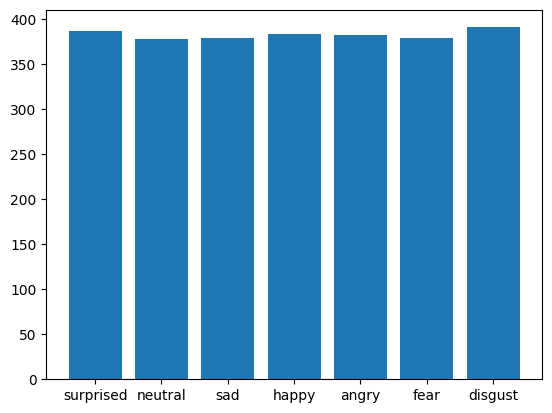

In [6]:
from collections import Counter
freq_emotions = Counter(emotions_)
plt.bar(freq_emotions.keys(),freq_emotions.values())

#### Visualize sample audio signal using librosa

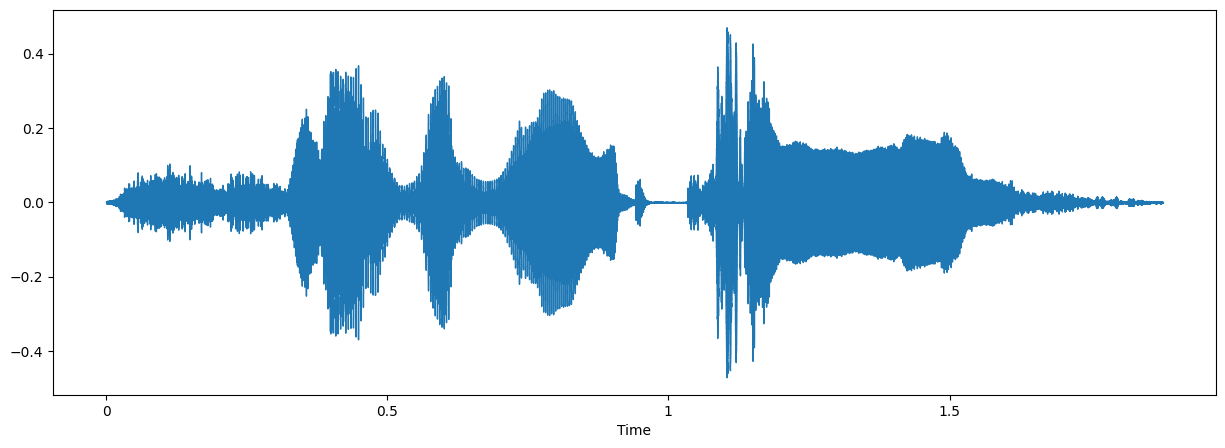

In [7]:
sample_audio_path = 'Tess/YAF_fear/YAF_cool_fear.wav'

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [8]:
def extract_feature(file_name):
    """Function Extracts Features from WAV file"""
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [9]:
sample_feature = extract_feature(wav_files[0]) #,mfcc=True, chroma=True, mel=True)
sample_feature.shape

(180,)

#### Create a dictionary or a function to encode the emotions

In [10]:
emotions = {'angry':5, 'disgust':7, 'fear':6, 'happy':3, 'neutral':1, 'surprised':8, 'sad':4}

#### TESS data feature extraction

**Note:** Features are already saved in DataFrame and given in csv file, Ignore the below commented code

In [11]:
# Load the data and extract features for each sound file
# tess_x, tess_y = [], []
# for file_name in wav_files:
#     emotion = emotions[file_name.split("_")[-1][:-4]]
#     feature = extract_feature(file_name)
#     tess_x.append(feature)
#     tess_y.append(emotion)

# len(tess_x), len(tess_y)

In [12]:
# set(tess_y)

#### Ravdess data feature extraction

In [13]:
rav_wav_files = glob.glob("ravdess/*/*.wav")
len(rav_wav_files), rav_wav_files[0]

(1168, 'ravdess/Actor_24/03-01-05-01-02-02-24_angry.wav')

In [14]:
# rav_x, rav_y = [], []
# for file_name in rav_wav_files:
#     emotion = emotions[file_name.split("_")[-1][:-4]]
#     feature = extract_feature(file_name)
#     rav_x.append(feature)
#     rav_y.append(emotion)
# len(rav_x), len(rav_y)

In [15]:
# set(rav_y)

In [16]:
# features = tess_x + rav_x
# labels = tess_y + rav_y

In [17]:
# Download extracted features csv
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/tess_ravdess_features.csv

In [18]:
extracted = pd.read_csv("tess_ravdess_features.csv")
features = extracted.iloc[:,:-1]
labels = extracted.iloc[:,-1]
features.shape, labels.shape

((3847, 180), (3847,))

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [19]:
# saved_data = pd.DataFrame(features)
# saved_data['label'] = labels
# saved_data.to_csv("tess_ravdess_features.csv",index=False)

#### Split the data into train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(np.array(features), np.array(labels), test_size=0.2, random_state=42)
X_train.shape, X_test.shape, len(y_train)

((3077, 180), (770, 180), 3077)

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

#### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.7818181818181819, 0.7809554761130971)

In [22]:
# Feature Importance using LogisticRegression
lr_coefficients = lr.coef_[0]

   Feature  Importance
35      35    0.131878
36      36    0.131181
6        6    0.105604
34      34    0.104532
8        8    0.095103
..     ...         ...
27      27   -0.064159
31      31   -0.075892
29      29   -0.077039
25      25   -0.088426
30      30   -0.100211

[180 rows x 2 columns]


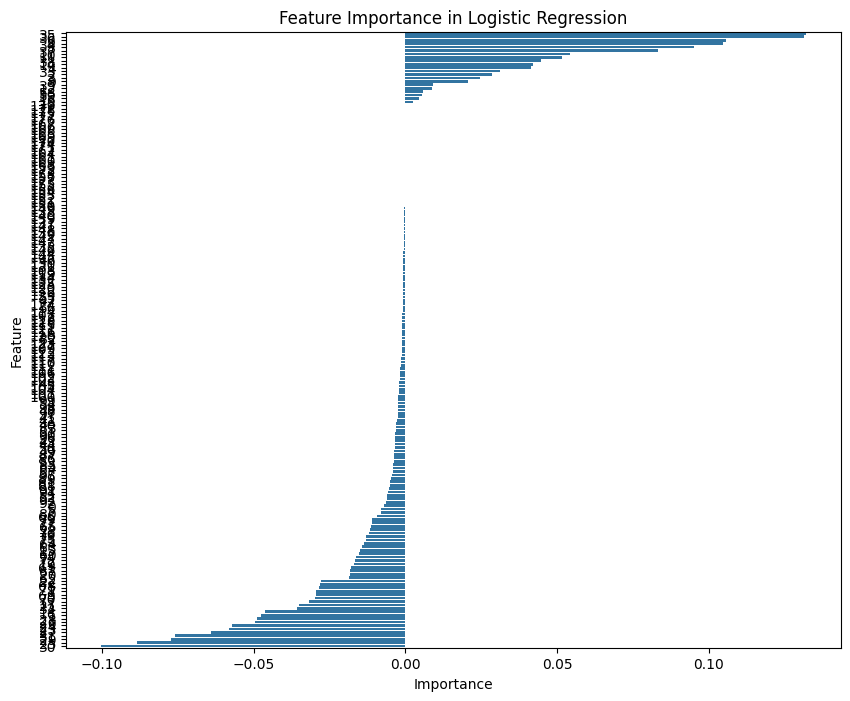

In [23]:
# Create a DataFrame for feature importance
logistic_feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': lr_coefficients
})

# Sort the features by importance
logistic_feature_importance = logistic_feature_importance.sort_values(by='Importance', ascending=False)
print(logistic_feature_importance)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

#### DecisionTreeClassifier

In [24]:
# Decision Tree
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(random_state=42)
dt_model = dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test), dt_model.score(X_train, y_train)

(0.7480519480519481, 1.0)

    Feature  Importance
35       35    0.097730
89       89    0.065218
20       20    0.056363
26       26    0.053102
31       31    0.051680
..      ...         ...
151     151    0.000000
143     143    0.000000
109     109    0.000000
114     114    0.000000
41       41    0.000000

[180 rows x 2 columns]


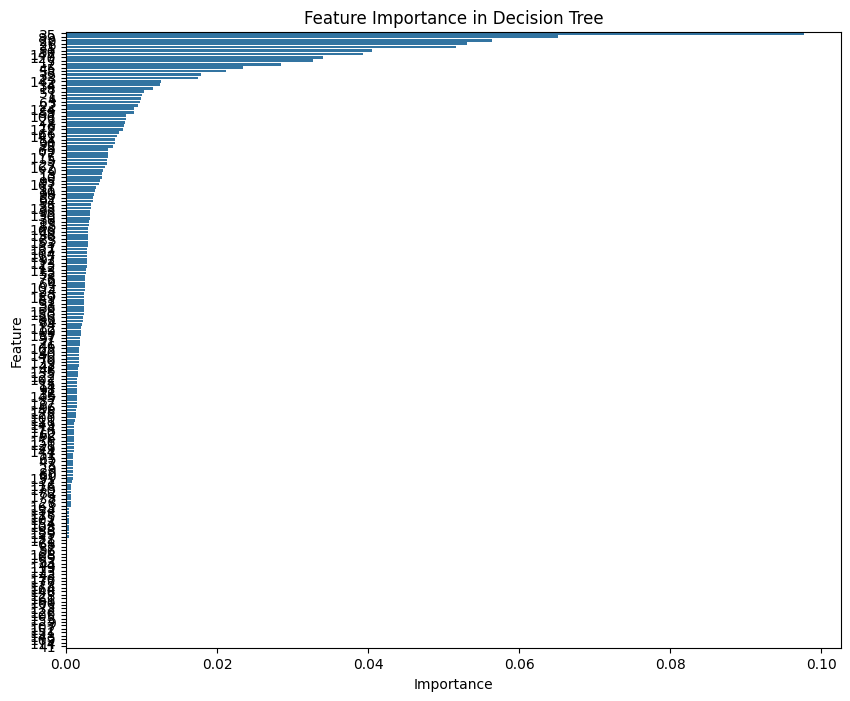

In [25]:
# Feature Importances using DecisionTreeClassifier

# Getting the feature importances
dt_feature_importances = dt_model.feature_importances_

# Creating a DataFrame for feature importance
dt_feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': dt_feature_importances
})

# Sort the features by importance
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
print(dt_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df)
plt.title('Feature Importance in Decision Tree')
plt.show()

#### RandomForestClassifier

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test), rf_model.score(X_train, y_train)

(0.8558441558441559, 1.0)

    Feature  Importance
62       62    0.024260
17       17    0.019723
58       58    0.019270
63       63    0.017318
36       36    0.017218
..      ...         ...
104     104    0.002083
155     155    0.001982
80       80    0.001906
109     109    0.001799
153     153    0.001740

[180 rows x 2 columns]


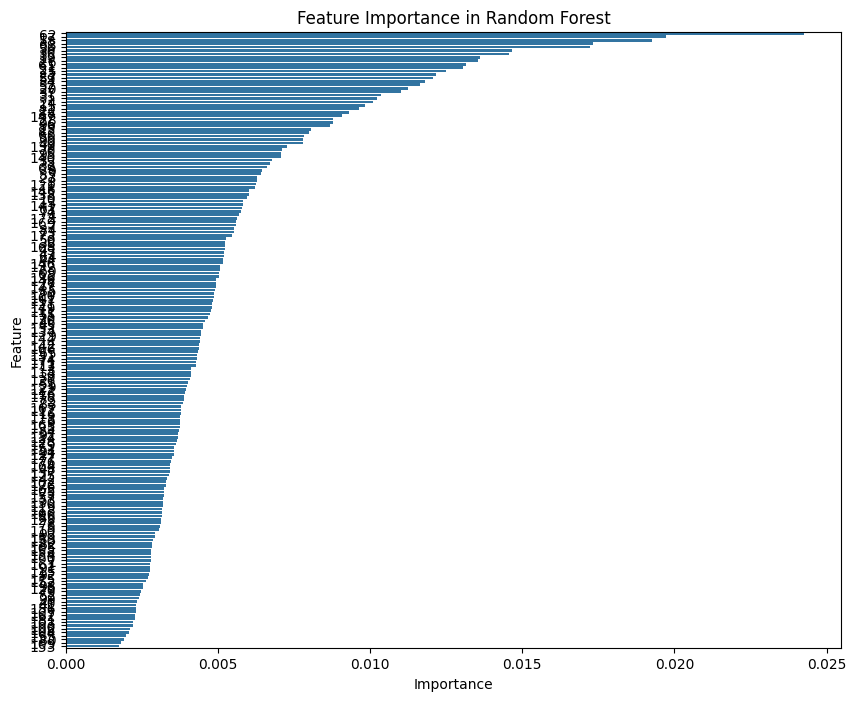

In [27]:
# Feature Importances using RandomForestClassifier
# Get the feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_feature_importances
})

# Sort the features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
print(rf_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

#### LinearSVC

In [28]:
#Linear SVC
from sklearn.svm import LinearSVC

Lsvm = LinearSVC(random_state=0, tol=1e-5)
Lsvm.fit(X_train, y_train)
Lsvm.score(X_test, y_test)

0.8168831168831169

   Feature  Importance
84      84    0.451065
83      83    0.415426
59      59    0.320537
40      40    0.280909
45      45    0.258503
..     ...         ...
43      43   -0.593360
68      68   -0.698782
63      63   -0.813336
64      64   -0.859348
57      57   -0.966953

[180 rows x 2 columns]


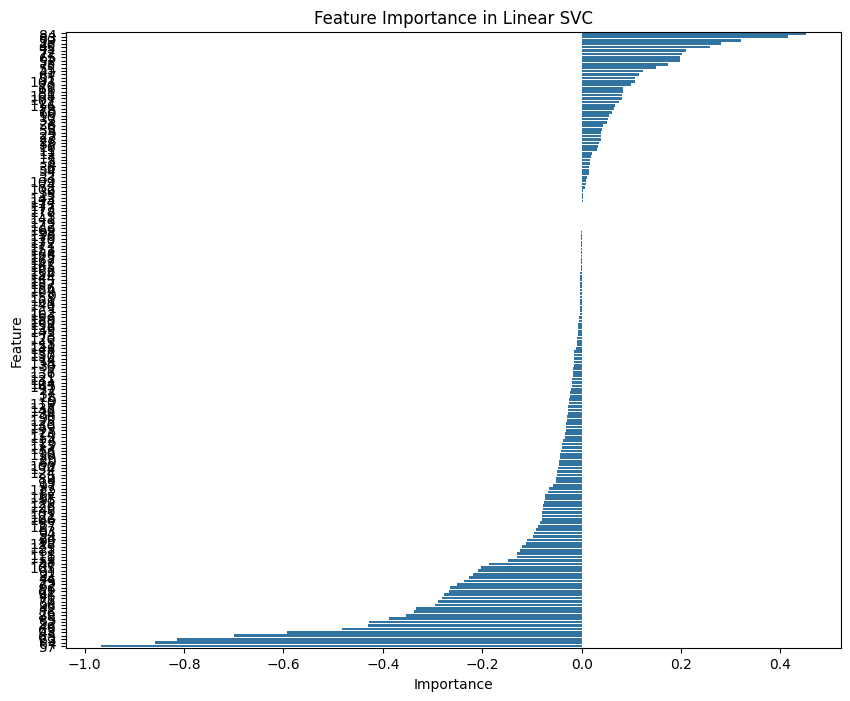

In [29]:
# Feature Importances using LinearSVC
# Get the feature importances (coefficients)
linearSVC_coefficients = Lsvm.coef_[0]

# Create a DataFrame for feature importance
linearSVC_feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': linearSVC_coefficients
})

# Sort the features by importance
linearSVC_feature_importance_df = linearSVC_feature_importance_df.sort_values(by='Importance', ascending=False)
print(linearSVC_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=linearSVC_feature_importance_df)
plt.title('Feature Importance in Linear SVC')
plt.show()

#### SGDClassifier

In [30]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, tol=1e-3)

sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.6311688311688312

   Feature  Importance
6        6  408.240519
8        8  365.151454
10      10  263.131696
35      35  246.041723
34      34  226.732418
..     ...         ...
5        5 -153.308843
1        1 -161.507022
30      30 -224.042262
25      25 -274.542462
31      31 -289.103703

[180 rows x 2 columns]


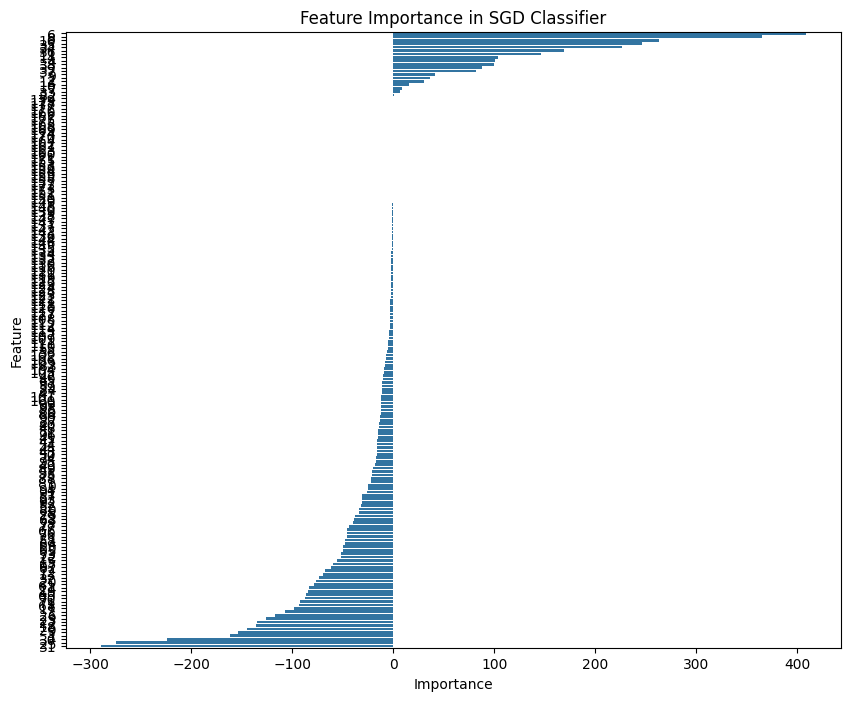

In [31]:
# Feature Importances using SGDClassifier
# Get the feature importances (coefficients)
sgd_coefficients = sgd.coef_[0]

# Create a DataFrame for feature importance
sgd_feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': sgd_coefficients
})

# Sort the features by importance
sgd_feature_importance_df = sgd_feature_importance_df.sort_values(by='Importance', ascending=False)
print(sgd_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=sgd_feature_importance_df)
plt.title('Feature Importance in SGD Classifier')
plt.show()

#### XGBClassifier

In [32]:
# XGBoost Classifier
# Encode labels to be zero-based
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(np.array(features), np.array(encoded_labels), test_size=0.2, random_state=42)

# Create and train the XGBClassifier model
num_classes = len(np.unique(encoded_labels))

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification objective
    num_class=num_classes,       # Number of unique classes
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Reverse the encoding of predictions
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


    Feature  Importance
80       80    0.038204
172     172    0.033981
89       89    0.033131
27       27    0.031647
63       63    0.029398
..      ...         ...
158     158    0.000000
176     176    0.000000
155     155    0.000000
154     154    0.000000
113     113    0.000000

[180 rows x 2 columns]


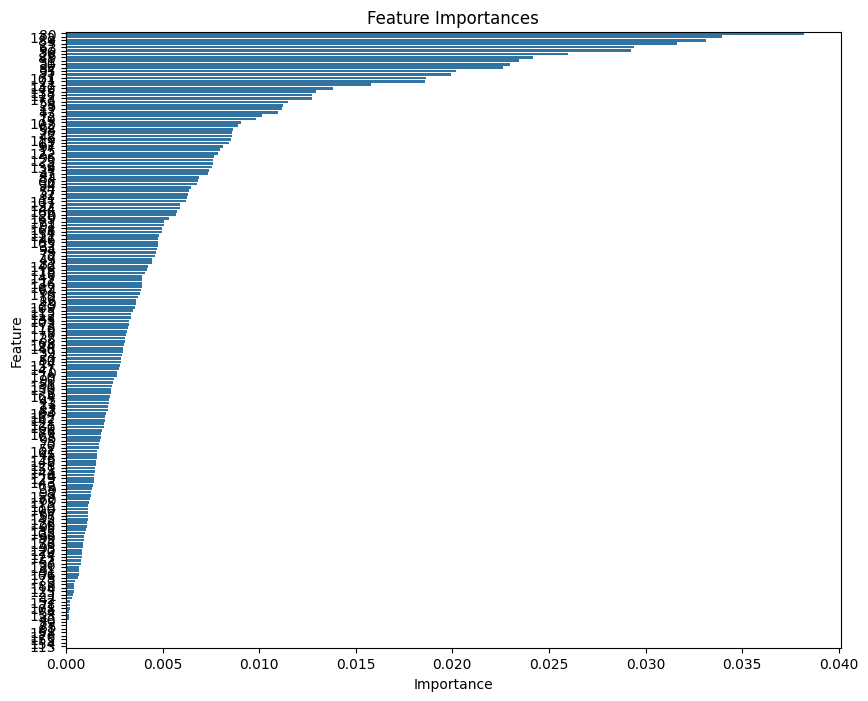

In [33]:
# Feature Importances using XGBClassifier
# Display feature importances
xgb_feature_importances = xgb_model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
xgb_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

print(xgb_feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Apply the voting classifier

In [34]:
# Voting classifer
lr = LogisticRegression(random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
rf_model_v = RandomForestClassifier(random_state=42)
Lsvm = LinearSVC(random_state=0, tol=1e-5)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification objective
    num_class=num_classes,       # Number of unique classes
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=10,
    random_state=42
)
voting = VotingClassifier(estimators=[('lr',lr), ('dt', dt), ('rf', rf_model_v), ('sgd', sgd),('Lsvm',Lsvm), ('xgb', xgb_model)], voting='hard')
voting = voting.fit(X_train, y_train)
voting.score(X_test, y_test)

0.8337662337662337

In [35]:
# Feature Importances using VotingClassifier
# Combine feature importances into a DataFrame for visualization
features_list = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Decision Tree Importance': dt_feature_importances,
    'Random Forest Importance': rf_feature_importances,
    'Logistic Regression Importance': lr_coefficients,
    'Linear SVC Importance': linearSVC_coefficients,
    'SGD Importance': sgd_coefficients,
    'XGB Importance': xgb_feature_importances
})
feature_importance_df.head()

,Feature,Decision Tree Importance,Random Forest Importance,Logistic Regression Importance,Linear SVC Importance,SGD Importance,XGB Importance
0,0,0.004866,0.006431,-0.006941,-0.003049,-24.693895,0.002662
1,1,0.010104,0.002783,-0.047401,-0.003595,-161.507022,0.000348
2,2,0.028482,0.010235,0.028484,0.014549,36.102390,0.007599
3,3,0.000945,0.004121,0.024500,0.000383,-107.033318,0.000460
4,4,0.009954,0.005691,0.041231,0.016270,100.775734,0.001466


- min and max feature importances

In [36]:
# Calculate min and max feature importances
min_importances = {
    'Logistic Regression': lr_coefficients.min(),
    'Decision Tree': dt_feature_importances.min(),
    'Random Forest': rf_feature_importances.min(),
    'Linear SVC': linearSVC_coefficients.min(),
    'SGD': sgd_coefficients.min(),
    'XGB': xgb_feature_importances.min()
}

max_importances = {
    'Logistic Regression': lr_coefficients.max(),
    'Decision Tree': dt_feature_importances.max(),
    'Random Forest': rf_feature_importances.max(),
    'Linear SVC': linearSVC_coefficients.max(),
    'SGD': sgd_coefficients.max(),
    'XGB': xgb_feature_importances.max()
}

# Combine min and max values into a DataFrame
feature_importance_min_max_df = pd.DataFrame({
    'Classifier': min_importances.keys(),
    'Min Importance': min_importances.values(),
    'Max Importance': max_importances.values()
})
feature_importance_min_max_df

,Classifier,Min Importance,Max Importance
0,Logistic Regression,-0.100211,0.131878
1,Decision Tree,0.000000,0.097730
2,Random Forest,0.001740,0.024260
3,Linear SVC,-0.966953,0.451065
4,SGD,-289.103703,408.240519
5,XGB,0.000000,0.038204


#### Testing with a sample

In [37]:
# audio sample
test_sample = 'Tess/YAF_fear/YAF_cool_fear.wav'
ipd.Audio(test_sample)

In [38]:
# prediction
pred = rf_model.predict(extract_feature(test_sample).reshape(1,-1))
list(emotions.keys())[list(emotions.values()).index(int(pred[0]))]

'fear'

### Train the model with TESS + Ravdess + Team recorded data (2 points)

* Record the audio samples, extract features and combine with TESS data features
  - Record and gather all the team data with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

**Note:** Upload your team data by running the below cell and proceed with next cells

<font color="red">If the team data is not uploaded in the following cell, subsequent cells may result in errors.</font>

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Satyam_1_Angry.aac to Satyam_1_Angry.aac


In [40]:
!unzip -qq # Path here to unzip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

**Change the path below**

In [41]:
TeamData = glob.glob("/content/path_to_folder/*.wav")
len(TeamData)

0

#### Extracting features of team data and combine with TESS + Ravdess

In [42]:
# extracting team recorded data features
team_features = []
team_label = []
for i in TeamData:
  team_features.append(extract_feature(i))
  emt = (i.split("_")[-1][:-4]).strip()
  team_label.append(emotions[emt])

len(team_features),len(team_label)

(0, 0)

In [43]:
# combining team data with Tess + ravdess data
all_x = list(features.values) + team_features
all_y = list(labels) + team_label
len(all_x), len(all_y)

(3847, 3847)

In [44]:
set(all_y)

{1, 3, 4, 5, 6, 7, 8}

#### Train the different ML algorithms

In [45]:
# Split the data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(np.array(all_x), np.array(all_y), test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, len(ytrain)

((3077, 180), (770, 180), 3077)

In [46]:
# Decision Tree
dt_model_team = tree.DecisionTreeClassifier(random_state=42)
dt_model_team = dt_model_team.fit(xtrain, ytrain)
dt_model_team.score(xtest, ytest), dt_model_team.score(xtrain, ytrain)

(0.7480519480519481, 1.0)

In [47]:
# Random Forest
rf_model_team = RandomForestClassifier(random_state=42)
rf_model_team.fit(xtrain, ytrain)
rf_model_team.score(xtest, ytest), rf_model_team.score(xtrain, ytrain)

(0.8558441558441559, 1.0)

In [48]:
#Linear SVC
Lsvm = LinearSVC(random_state=0, tol=1e-5)
Lsvm.fit(xtrain, ytrain)
Lsvm.score(xtest, ytest)

0.8168831168831169

### Test the best working model with live audio recording

In [49]:
MODEL = rf_model

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features (which will be introduced in Module 5 for another audio classification task). Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).


### Kaggle Testset predictions

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!unzip -qq /content/Kaggle_Testset.zip

In [ ]:
test_set = glob.glob("/content/Kaggle_Testset/*.wav")
test_set

In [ ]:
order = []
testset_features = []

for i in test_set:
  f = extract_feature(i)
  order.append(int(i.split("/")[-1].split('.')[0]))
  testset_features.append(f)

len(testset_features), len(testset_features[0])

In [ ]:
testset_pred = rf_model.predict(testset_features)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = order
submission['Label'] = testset_pred
submission['Id'] = submission.Id.astype('int')
submission

In [ ]:
submission.sort_values(by=['Id'],inplace=True)
submission

Change your labels to emotions for eg. `01 - sad` based on your label conversion

In [ ]:
emotions

In [ ]:
decode = dict(zip( emotions.values(), emotions.keys()))
decode

In [ ]:
submission['Label'] = submission.Label.replace(decode)
submission

In [ ]:
submission.to_csv("pred_submissions.csv", index=False)